In [1]:
# import necessary packages 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import warnings 

# filter warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Electric_Production.csv')

print (f"Number of missing values,{df.isna().sum()}\n")
print (f"df shape is, {df.shape} \n")
print (f"columns in df, {df.columns}\n")

df.head(10)

Number of missing values,DATE     0
Value    0
dtype: int64

df shape is, (397, 2) 

columns in df, Index(['DATE', 'Value'], dtype='object')



,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
5,06-01-1985,58.0904
6,07-01-1985,62.6202
7,08-01-1985,63.2485
8,09-01-1985,60.5846
9,10-01-1985,56.3154


In [4]:
# set date to index 
df.set_index('DATE', inplace=True)
df.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


In [5]:

df.rename (columns={'Value':'Consumption'}, inplace = True)

In [6]:
df.head(1)

,Consumption
DATE,
01-01-1985,72.5052


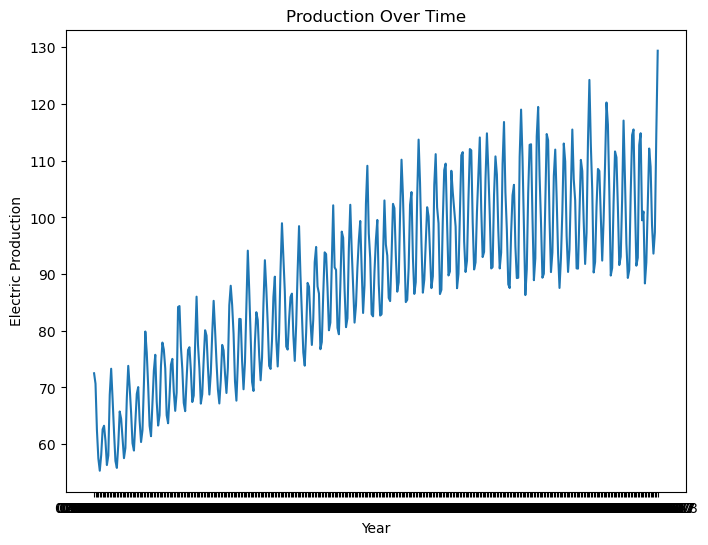

In [7]:
# visualize the time series 

plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Consumption'])
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Production Over Time')
plt.show()

Since there's a general steady increase in the consumption of oil, we will look at the consumption / energy demand per month for the interesting years. 

In [8]:
# make a copy of our df 
DF = df.copy()

In [9]:
# Conver to datetime 
df.index = pd.to_datetime(df.index)

# Get the years associated with our dataset 
unique_years = df.index.year.unique()

print("unique years are {unique_years}")


unique years are {unique_years}


In [10]:
unique_years

Int64Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018],
           dtype='int64', name='DATE')

In [11]:
df.head()

,Consumption
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [12]:
years = [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018]

# Create a new DataFrame to store the results
result_df = pd.DataFrame(columns=['year', 'sum'])

# Iterate over the years
for year in years:
    # Filter the DataFrame for the current year
    year_df = df[df.index.year == year]
    
    # Calculate the sum for the current year
    consumption_sum = year_df['Consumption'].sum()
    
    # Append the result to the new DataFrame
    result_df = result_df.append({'year': year, 'sum': consumption_sum}, ignore_index=True)

yearly_df = pd.DataFrame(result_df)
yearly_df

,year,sum
0,1985.0,745.9880
1,1986.0,752.5187
2,1987.0,788.8833
3,1988.0,836.5963
4,1989.0,862.7420
5,1990.0,879.7612
6,1991.0,901.3422
7,1992.0,901.4509
8,1993.0,932.1479
9,1994.0,951.0607


In [13]:
yearly_df.set_index('year', inplace = True)

yearly_df

,sum
year,
1985.0,745.9880
1986.0,752.5187
1987.0,788.8833
1988.0,836.5963
1989.0,862.7420
1990.0,879.7612
1991.0,901.3422
1992.0,901.4509
1993.0,932.1479


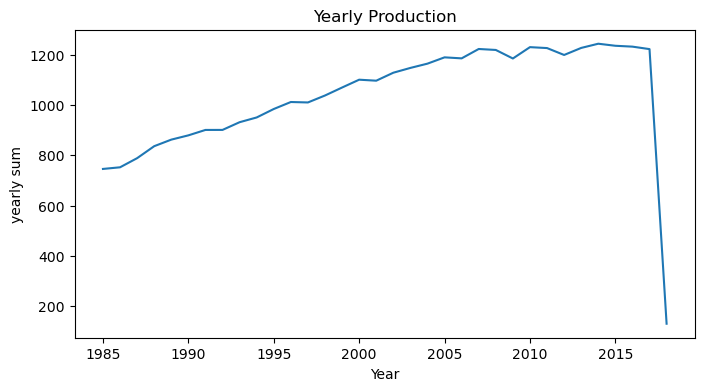

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(yearly_df.index, yearly_df['sum'])
plt.xlabel('Year')
plt.ylabel('yearly sum')
plt.title('Yearly Production')
plt.show()


In [16]:
df.head()

,Consumption
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## CHECK FOR STATIONARITY 

## METHOD 1 - VISUAL INSPECTION

Using visual inspection I have already determined that this dataset is not stationary, 
but it has an upword increasing trend 

# METHOD 2 - ADFULLER TEST 

Focus on the p-value to be less than 0.05 